In [1]:
import pandas as pd
import numpy as np
import os

import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

<img src="rate.png">

Background - #F3F7F7

Title - #3A3F4A, 36px

Caption - #5D646F, 12px

Axis text - #5D646F, 12 px

Legend title & text - #5D646F, 12 px

Font Family - Ubuntu Mono

Color scale #67001f, #f7f7f7, #053061

In [2]:
df = pd.read_csv("rate.csv")
df.head(2).append(df.tail(2))

,region,year,rate
0,Crimea,1990,2.5
1,Vinnytsia,1990,-2.1
781,Kyiv city,2018,0.8
782,Sevastopol,2018,NaN


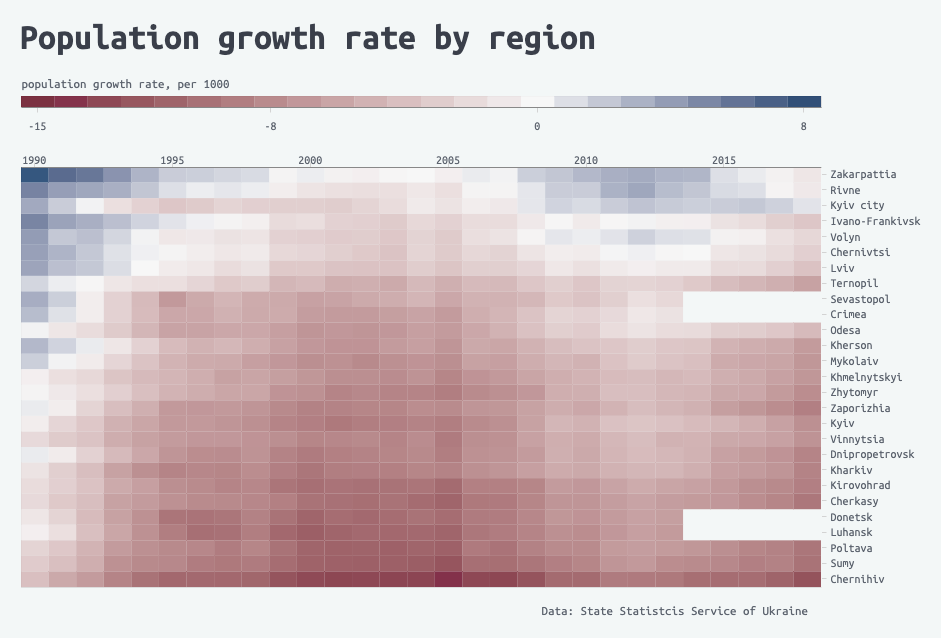

In [3]:
df_legend = pd.DataFrame({'rate': list(range(-15,9))})
domain = [df.rate.min(), 0, df.rate.max()]
legend = alt.Chart(df_legend).mark_rect().encode(
    alt.X('rate:O',title = "population growth rate, per 1000", axis = alt.Axis(values=[-15, -8, 0, 8], orient="bottom", titleY=-30,
    titleX=0,)),

    color=alt.Color('rate:Q', scale=alt.Scale(range=['#67001f','#f7f7f7', '#053061'], domain=domain), legend=None),
    opacity=alt.value(0.8)
).properties(
    width=800, height=11
)

main_plot = alt.Chart(df).mark_rect().encode(
    alt.X('year:O',title = "Data: State Statistcis Service of Ukraine", axis = alt.Axis(values=[1990,1995,2000,2005, 2010, 2015])),
    alt.Y('region:O', title = "", sort=alt.EncodingSortField(
            field="rate",  # The field to use for the sort
            op="mean",  # The operation to run on the field prior to sorting
            order="descending"  # The order to sort in
        )),
    color=alt.Color('rate:Q', scale=alt.Scale(range=['#67001f','#f7f7f7', '#053061'], domain=domain), legend=None),
    opacity=alt.value(0.8)
).properties(
    width=800, height=420
)


alt.vconcat(legend, main_plot).configure(
    background="#F3F7F7",
    padding={"left": 20, "top": 20, "right": 20, "bottom": 20}
).configure_axis(
    labelColor="#5D646F",
    labelFontSize=12,
    labelFont="Ubuntu Mono",
    titleFont="Ubuntu Mono",
    tickColor="lightGray",
    titleFontWeight = "normal"
).configure_axisX(
    titleAngle=0,
    titleAlign="left",
    titleY=450,
    titleX=520,
    labelAngle=0,
    labelPadding=8,
    titleFontSize=13,
    titleColor="#5D646F",
    orient="top"
).configure_axisY(
    orient="right",
    labelPadding=4,
    titleColor="#5D646F",
    domainColor="#F3F7F7",
    titleAngle=0,
    titleAlign="left",
    titleY=-50,
    titleX=-800,
    titleFontSize=12
).configure_title(
    fontSize=36,
    dx = 0,
    dy = -15,
    color="#3A3F4A",
    font = "Ubuntu Mono"
).properties(title ="Population growth rate by region")